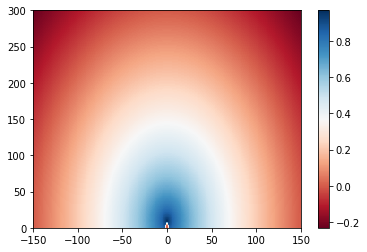

In [4]:
# Plot of reward function: x, z

import numpy as np
from pylab import *
import matplotlib.pyplot as plt

target_pos = np.array([0., 0., 10.]) 
upper_bounds = np.array([150., 150., 300.]) 
lower_bounds = np.array([-150., -150., 0.]) 
maxRange = [upper_bounds - target_pos, target_pos - lower_bounds]
maxRange = np.max(maxRange, axis=0)

def reward(x, z, v):
    xz = np.dstack((x, z))
 
    s = xz - target_pos[1:]
    s_normalized = np.linalg.norm(s/maxRange[1:], axis=2)
    s_reward = (1. - 1.*np.power(s_normalized, .6))
    
    # The quadcopter has a tendency to get stuck in the local minimum pos [0, 0, 0]
    # when simplify the Action space to 5 actions: 4 delta rotor speeds plus mean rotor speeds.
    # The purpose of local_minimum_discount is to push the quadcopter away from this point
    local_minimum = np.linalg.norm(xz/[2., 8.], axis=2)
    local_minimum_discount = np.power(1. - np.clip(1. - local_minimum, 0, 1), 4.)

    return s_reward * local_minimum_discount


x = linspace(-150, 150, num=300)
z = linspace(0, 300, num=300)
X,Z = meshgrid(x, z)

v = np.array([30., 0., 0.])
fig, ax = subplots()
R = reward(X, Z, v)
p = ax.pcolor(X, Z, R, cmap=cm.RdBu, vmin=R.min(), vmax=R.max())
cb = fig.colorbar(p)